In [43]:
from datetime import datetime
import backtrader as bt
import yfinance as yf
import pandas as pd

In [44]:
# Create a subclass of Strategy to define the indicators and logic

class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


In [45]:
cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

In [46]:
# Create a data feed
data = pd.DataFrame(yf.download('BTC-USD','2012-01-01','2020-10-10'))
cerebro.adddata(    bt.feeds.PandasData(dataname=data))  # Add the data feed

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>


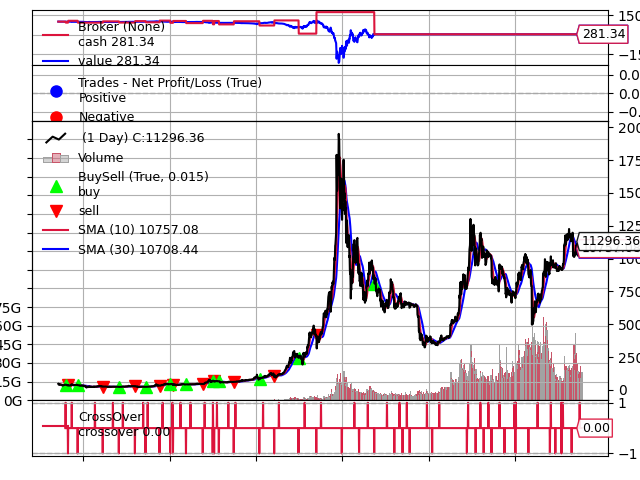

<IPython.core.display.Javascript object>


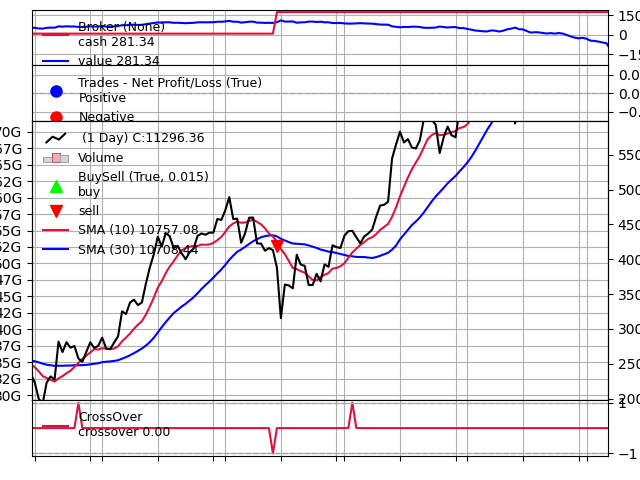

[[<Figure size 640x480 with 5 Axes>], [<Figure size 640x480 with 5 Axes>]]

In [48]:
cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.run()  # run it all
cerebro.plot(figsize=(18, 15))  # and plot it with a single command